# Credit Card Fraud Detection

Credit card fraud is a significant issue worldwide, affecting millions of people each year. In the United States alone, where the majority of the population owns credit cards, fraud is widespread. The problem is not limited to the US; countries like Brazil also face substantial fraud rates, with millions falling victim to credit card fraud annually.

In this project, we aim to tackle fraud detection using a dataset from Kaggle. This dataset comprises credit card transactions made by European cardholders in September 2013. Over this two-day period, there were 492 instances of fraud out of a total of 284,807 transactions. This dataset is highly unbalanced, as fraudulent transactions make up only a tiny fraction (0.17%) of the total. The dataset consists mainly of numerical features resulting from Principal Component Analysis (PCA) transformation, with only the 'Time' and 'Amount' features remaining unchanged. The 'Class' feature indicates whether a transaction is fraudulent (1) or not (0).

**Our project's objective is to develop machine learning models capable of accurately identifying credit card fraud based on this data. We will compare the performance of different models using one method to balance the dataset. Through these steps, we aim to evaluate and compare the effectiveness of various models in detecting credit card fraud.**


# Business Understanding
Credit Card Fraud Detection is a classic class-imbalance problem where the number of fraud transactions is much lesser than the number of legitimate transaction for any bank. Most of the approaches involve building model on such imbalanced data, and thus fails to produce results on real-time new data because of overfitting on training data and a bias towards the majoritarian class of legitimate transactions. Thus, we can see this as an anomaly detection problem.

1. What time does the Credit Card Frauds usually take place?
2. What are the general trends of amounts for Credit Card Fraud Transactions?
3. How do we balance the data to not let the model overfit on legitimate transactions?





In [ ]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Balance Data
from imblearn.over_sampling import SMOTE

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier


# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from statistics import stdev
from sklearn.model_selection import KFold

import pickle

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv.zip")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Understanding


* The Data has 32 features from V1-V28 which are unknown for
confidentiality, TIme, Amount and Class
* The input features are V1-V28, Time and Amount
* The target variable is Class
* The Data does not have any missing values as evident from the below mentioned code, thus need not be handled
* The Data consists of all numerical features
    
    *Class 0: Legitimate Transaction*
   
    *Class 1: Fraud Transaction*

---



# Exploratory Data Analysis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We now know:

The dataset is constituted of 284,806 rows and 31 columns;

* There are no missing values;
* All the columns contain only numeric values.
* Time and Amount are the only two features that have not been transformed. Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount.

In [ ]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### The dataset is clean and there is no missing values in it

In [ ]:
# statistical analysis of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


Both these columns contain a wide range of values, going from to zero to dozen of thousands. The values seem to be better distributed in the Time columns.Let's plot histograms for both theses features considering the Class column, which represents the frauds.

<ipython-input-8-3169d9334c1c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'][df['Class'] == 1], bins=15, ax=ax1)
<ipython-input-8-3169d9334c1c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'][df['Class'] == 0], bins=15, ax=ax2)
<ipython-input-8-3169d9334c1c>:9: UserWarn

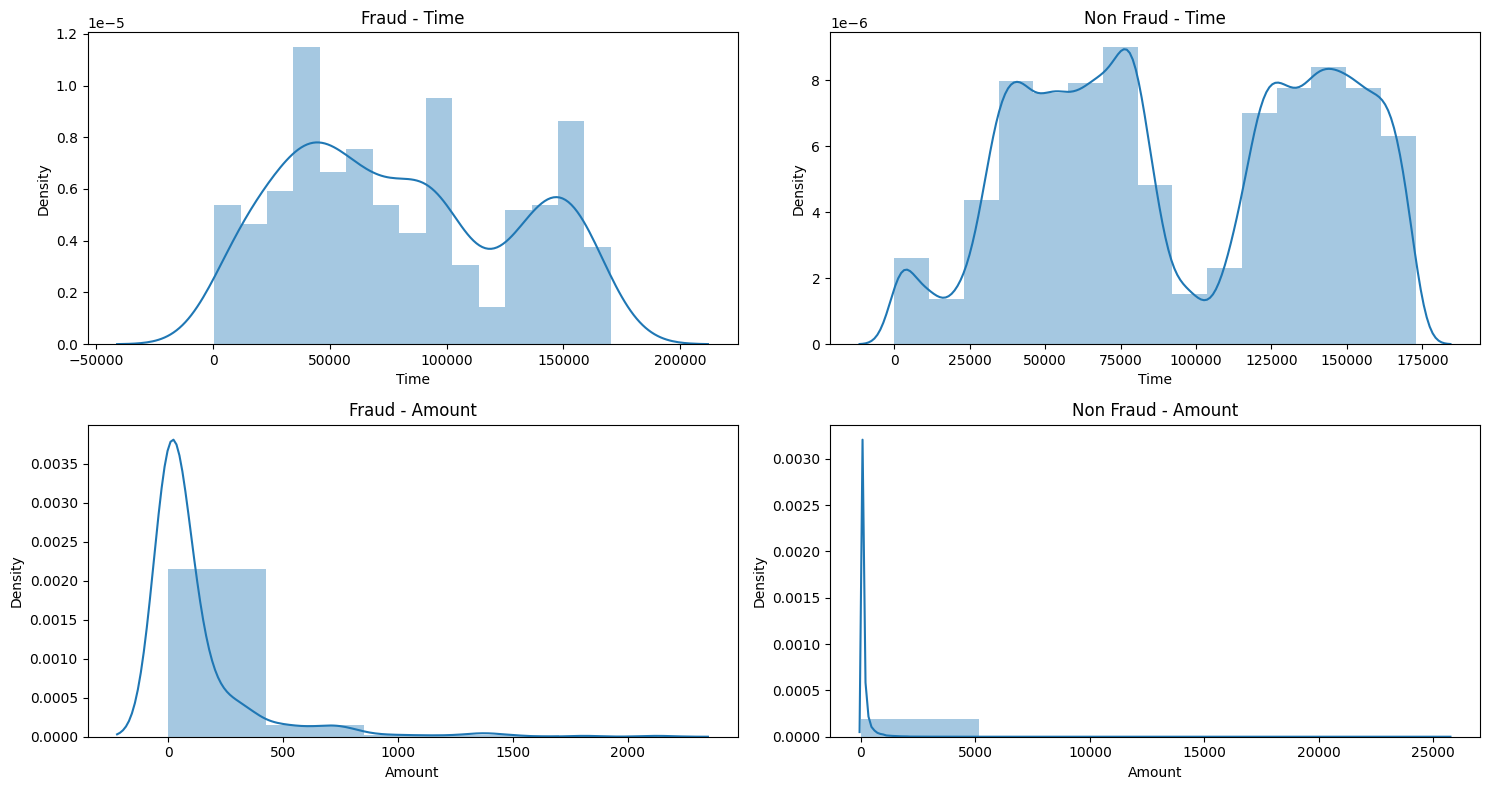

In [ ]:
# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))

# Plot distributions for 'Time' for both fraud and non-fraud transactions
sns.distplot(df['Time'][df['Class'] == 1], bins=15, ax=ax1)
sns.distplot(df['Time'][df['Class'] == 0], bins=15, ax=ax2)

# Plot distributions for 'Amount' for both fraud and non-fraud transactions
sns.distplot(df['Amount'][df['Class'] == 1], bins=5, ax=ax3)
sns.distplot(df['Amount'][df['Class'] == 0], bins=5, ax=ax4)

# Set titles for each subplot
ax1.set_title('Fraud - Time')
ax2.set_title('Non Fraud - Time')
ax3.set_title('Fraud - Amount')
ax4.set_title('Non Fraud - Amount')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# detail analysis of label column
num_normal_transactions = sum(df['Class'] == 0)
num_frauds = sum(df['Class'] == 1)
total_transactions = len(df['Class'])

print(f'The number of normal transactions: {num_normal_transactions}')
print(f'The number of frauds: {num_frauds}')
print(f'The percentage of fraud of all transactions: {num_frauds / total_transactions * 100:.2f}%')


The number of normal transactions: 284315
The number of frauds: 492
The percentage of fraud of all transactions: 0.17%


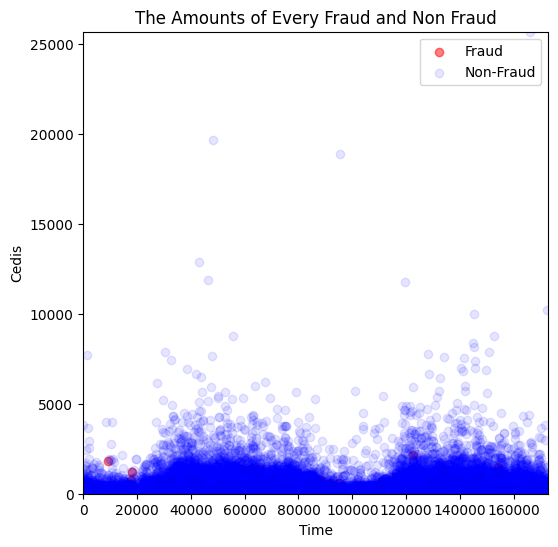

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Time'][df.Class == 1], df['Amount'][df.Class == 1], alpha=0.5, label='Fraud', color='red')
plt.scatter(df['Time'][df.Class == 0], df['Amount'][df.Class == 0], alpha=0.1, label='Non-Fraud', color='blue')

plt.margins(0)
plt.title('The Amounts of Every Fraud and Non Fraud')
plt.xlabel('Time')
plt.ylabel('Cedis')
plt.legend()
plt.show()

<ipython-input-11-c94f79e2d688>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class == 1], bins=50, kde=False, label='Fraud', color='red')
<ipython-input-11-c94f79e2d688>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class == 0], bins=50, kde=False, label='Non-Fraud', c

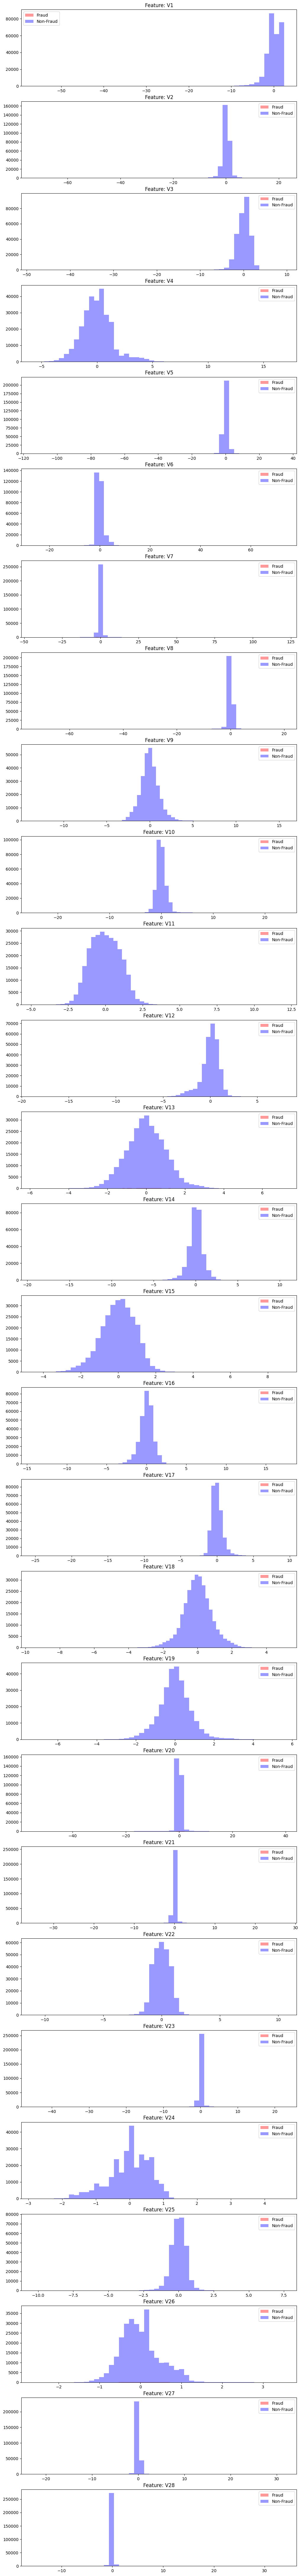

In [ ]:
plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)

for i, cn in enumerate(df[df.iloc[:, 1:29].columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50, kde=False, label='Fraud', color='red')
    sns.distplot(df[cn][df.Class == 0], bins=50, kde=False, label='Non-Fraud', color='blue')
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(cn))
    ax.legend()

plt.show()

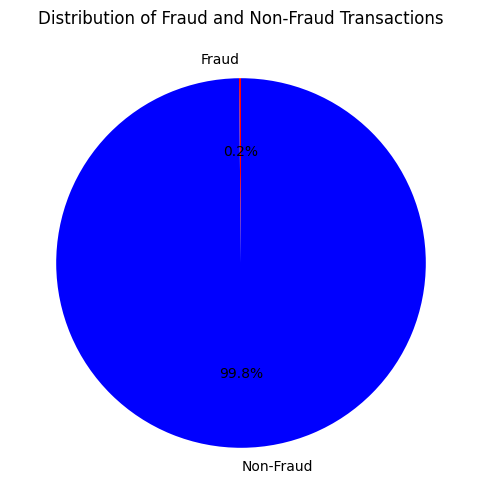

In [ ]:
# Count the number of fraud and non-fraud transactions
fraud_count = df[df['Class'] == 1].shape[0]
non_fraud_count = df[df['Class'] == 0].shape[0]

# Create a pie chart
labels = ['Fraud', 'Non-Fraud']
sizes = [fraud_count, non_fraud_count]
colors = ['red', 'blue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.show()

<Axes: >

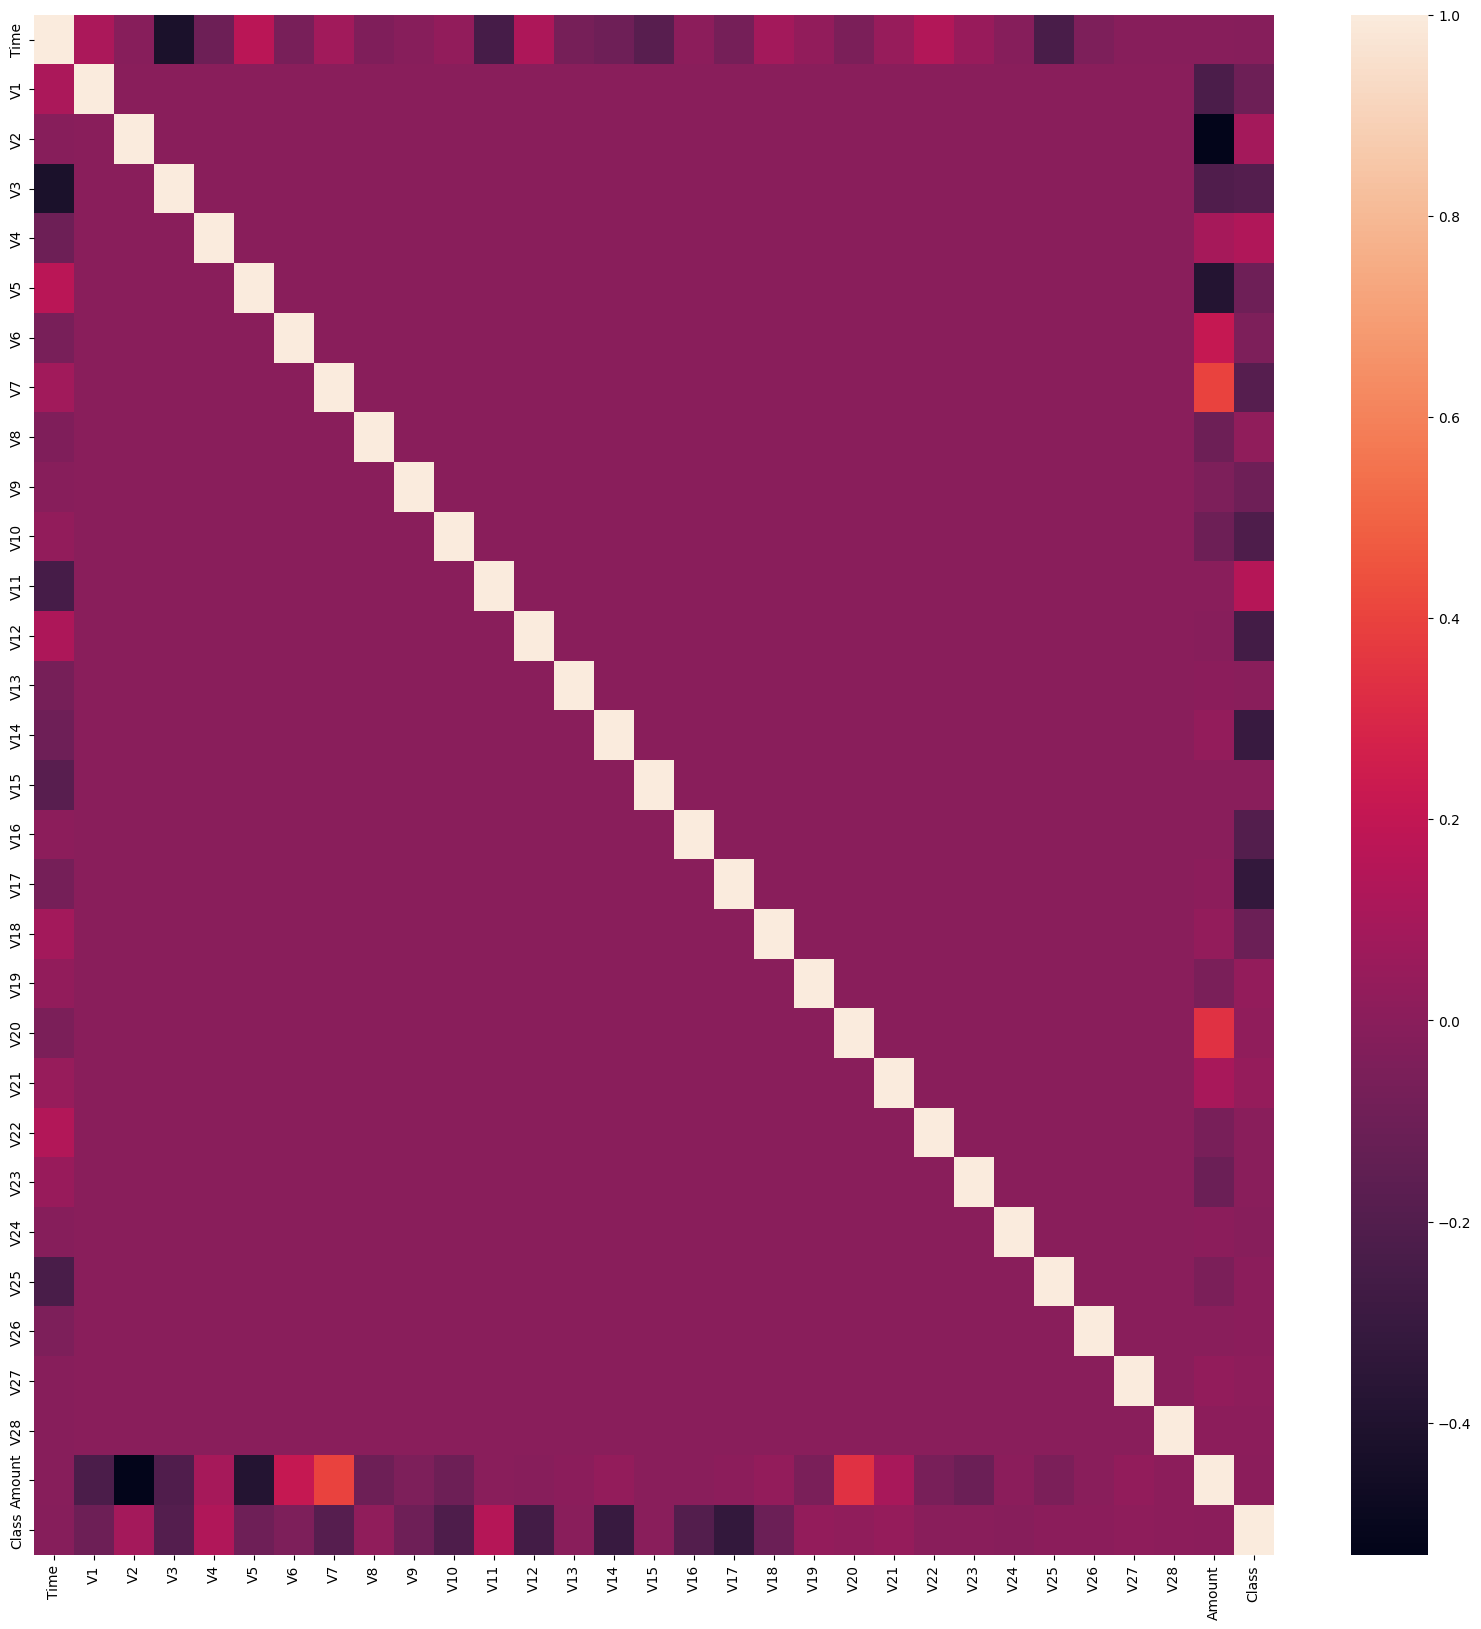

In [ ]:
plt.figure(figsize=(20,20))
df_corr = df.corr()
sns.heatmap(df_corr)

Normalizing the Amount variable

In [ ]:

# Fit the scaler to the 'Amount' and 'Time' column

scaler = StandardScaler()

# Fit the scaler to 'Amount' and 'Time' columns separately
fitted_scaler_amount = scaler.fit(df['Amount'].values.reshape(-1, 1))
fitted_scaler_time = scaler.fit(df['Time'].values.reshape(-1, 1))

# Transform the 'Amount' and 'Time' columns
df['Amount'] = fitted_scaler_amount.transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = fitted_scaler_time.transform(df['Time'].values.reshape(-1, 1))


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-1.993432,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.996526,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-1.988609,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-1.993982,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-1.995109,0


In [ ]:
# Lets drop the column
X = df.drop(['Class',], axis=1) # other features
y = df.Class # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
# Data Balancing with SMOTE Technique
X_resample, y_resample = SMOTE(random_state=42).fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Class Distribution After SMOTE')

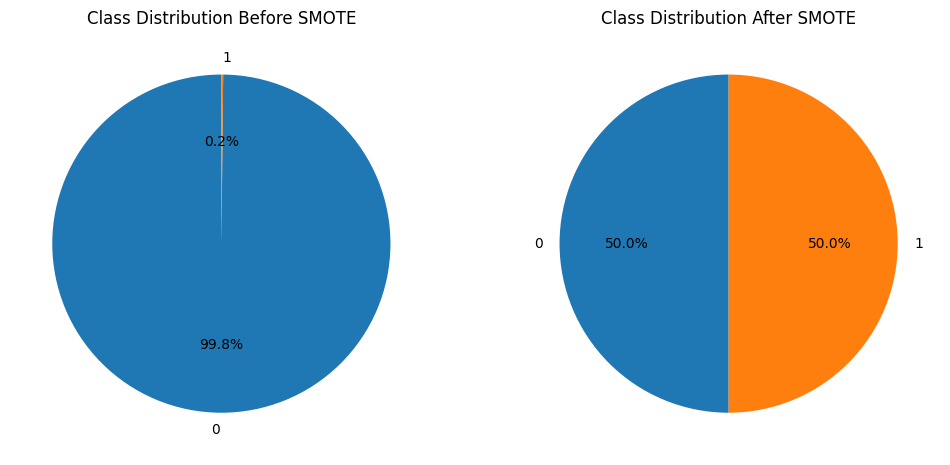

In [ ]:
# Calculate the class distribution before and after SMOTE
original_class_counts = y_train.value_counts()
resampled_class_counts = y_resample.value_counts()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before SMOTE
axes[0].pie(original_class_counts, labels=original_class_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Class Distribution Before SMOTE')

# After SMOTE
axes[1].pie(resampled_class_counts, labels=resampled_class_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Class Distribution After SMOTE')


In [ ]:
print('The number of transactions after resampling:', len(X_resample))
print('If the number of frauds is equal to the number of normal transactions?',
      str(sum(y_resample == 0) == sum(y_resample == 1)))


The number of transactions after resampling: 398040
If the number of frauds is equal to the number of normal transactions? True


# Modelling

######We will apply 3 machine learning algorithms for classification in this section. Since we have already resampled the dataset, f1 score will be used to evaluate which algorithm performs the best.


*   Logistic Regression
*   Randomforest Agorithm
*   DecisionTree Algorithm





#1. Logistic Regression

In [ ]:
lgr= LogisticRegression()
lgr_model=lgr.fit(X_resample, y_resample)

pred = lgr_model.predict(X_test)
prob = lgr_model.predict_proba(X_test)[:,1]

### Model Evaluation

In [ ]:
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

f2_lgt = fbeta_score(y_test, pred, beta=2, average='binary')
print("f2_score :", f2_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)


recall_score :  0.918918918918919
precision_score : 0.05915615484993476
f1_score : 0.11115651818553332
f2_score : 0.2352127291594604
accuracy_score : 0.9745444331308591
ROC_AUC Score: 0.5295059134684583


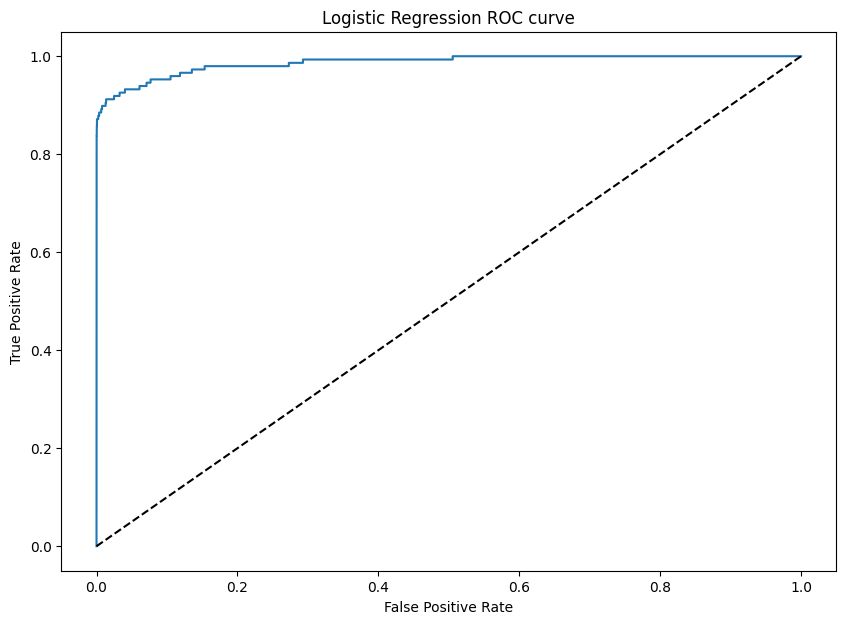

In [ ]:
# plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# 2. Randomforest Classifier

In [ ]:
RF_model= RandomForestClassifier()
RF_model= RF_model.fit(X_resample, y_resample)

rf_pred= RF_model.predict(X_test)
rf_proba= RF_model.predict_proba(X_test)[:,1]

## Model Evaluation

In [ ]:
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)


f2_rf = fbeta_score(y_test, rf_pred, beta=2, average='binary')
print("f2_score :", f2_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)

recall_score :  0.8648648648648649
precision_score : 0.8648648648648649
f1_score : 0.8648648648648649
f2_score : 0.8648648648648649
accuracy_score : 0.9995318516437859
ROC_AUC Score: 0.9323151922659515


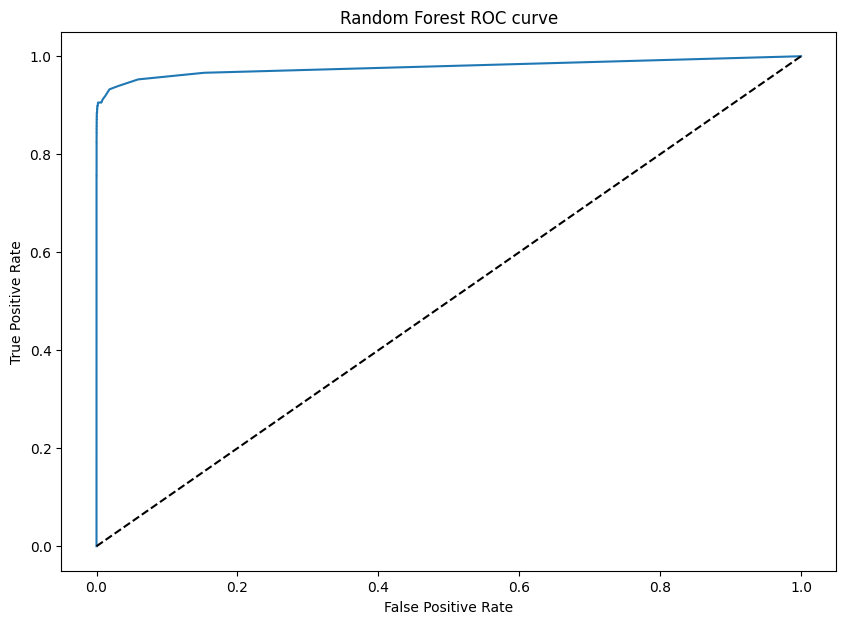

In [ ]:
# plot the model evaluation
fig, ax = plt.subplots(figsize=(10,7))
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# 3. DecisionTree Algorithm

In [ ]:
dtmodel = DecisionTreeClassifier()
dtmodel = dtmodel.fit(X_resample, y_resample)

dt_pred = dtmodel.predict(X_test)
dt_prob = dtmodel.predict_proba(X_test)[:,1]

In [ ]:
from joblib import dump, load

# Save the model
dump(dtmodel, 'model.joblib')

['model.joblib']

## Evaluation

In [ ]:
r_dt= recall_score(y_test, dt_pred)
print("recall_score : ", r_dt)

p_dt= precision_score(y_test, dt_pred)
print("precision_score :",p_dt)

f1_dt= f1_score(y_test, dt_pred)
print("f1_score :", f1_dt)

f2_dt = fbeta_score(y_test, dt_pred, beta=2, average='binary')
print("f2_score :", f2_dt)


A_dt= accuracy_score( y_test, dt_pred)
print("accuracy_score :", A_dt)

acu_dt = roc_auc_score(dt_pred, y_test)
print("ROC_AUC Score:",acu_dt)

recall_score :  0.8445945945945946
precision_score : 0.390625
f1_score : 0.5341880341880342
f2_score : 0.6853070175438596
accuracy_score : 0.9974485914586333
ROC_AUC Score: 0.695177401378006


In [ ]:
compare_models = ['Logistic Regression','Randomforest','DecisionTreeClassifier']

data={'Accuracy':[A_lgt,A_rf,A_dt],'Recall':[r_lgt,r_rf, r_dt],
      'Precision':[p_lgt, p_rf,p_dt], 'f1_score':[f1_lgt, f1_rf,f1_dt],
      'f2_score':[f2_lgt,f2_rf,f2_dt],
      'ROC_AUC':[acu_lgt, acu_rf,acu_dt],
      'Description':['','best model','']}
result=pd.DataFrame(data=data, index=compare_models)
result


,Accuracy,Recall,Precision,f1_score,f2_score,ROC_AUC,Description
Logistic Regression,0.974544,0.918919,0.059156,0.111157,0.235213,0.529506,
Randomforest,0.999532,0.864865,0.864865,0.864865,0.864865,0.932315,best model
DecisionTreeClassifier,0.997449,0.844595,0.390625,0.534188,0.685307,0.695177,


In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'CV F1 Mean', 'CV F1 Std'])

# Loop through models
for model_name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_resample, y_resample, cv=kf, scoring='f1', error_score="raise")

    cv_score_mean = scores.mean()
    cv_score_std = stdev(scores)

    # Append results to DataFrame
    results_df = results_df.append({'Model': model_name, 'CV F1 Mean': cv_score_mean, 'CV F1 Std': cv_score_std}, ignore_index=True)

# Display the results
print(results_df)

<ipython-input-30-50605459db85>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'CV F1 Mean': cv_score_mean, 'CV F1 Std': cv_score_std}, ignore_index=True)
<ipython-input-30-50605459db85>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'CV F1 Mean': cv_score_mean, 'CV F1 Std': cv_score_std}, ignore_index=True)


                 Model  CV F1 Mean  CV F1 Std
0  Logistic Regression    0.947030   0.000434
1         RandomForest    0.999892   0.000049
2        Decision Tree    0.997997   0.000183


<ipython-input-30-50605459db85>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name, 'CV F1 Mean': cv_score_mean, 'CV F1 Std': cv_score_std}, ignore_index=True)


# Model Improvement

# Hyperparameter Tuning

## *Randomforest Classifier*

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in tree
max_depth = [2,4,10, None]

# minimum number of samples required to split a node
min_samples_split = [2,5]

# minimum number of samples required at each leaf node
min_samples_leaf = [1,2]

# Method of selecting Samples for training each tree
bootstrap = [True]

In [ ]:
# create param grid

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [15, 22, 29, 36, 43, 51, 58, 65, 72, 80], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 10, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True]}


In [ ]:

# Create RandomizedSearchCV object
kf_RF = KFold(n_splits = 5,shuffle=True)
rf_Random = RandomizedSearchCV(estimator=RF_model, param_distributions=param_grid, n_iter=10,
                                cv=kf_RF, verbose=2, n_jobs=-1, scoring='f1', random_state=42)

# Fit the RandomizedSearchCV object
rf_Random_model = rf_Random.fit(X_resample, y_resample)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
y_pred_grid = rf_Random_model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.86      0.88      0.87       145

    accuracy                           1.00     85443
   macro avg       0.93      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



#Using Confusion Matrix For Predictions


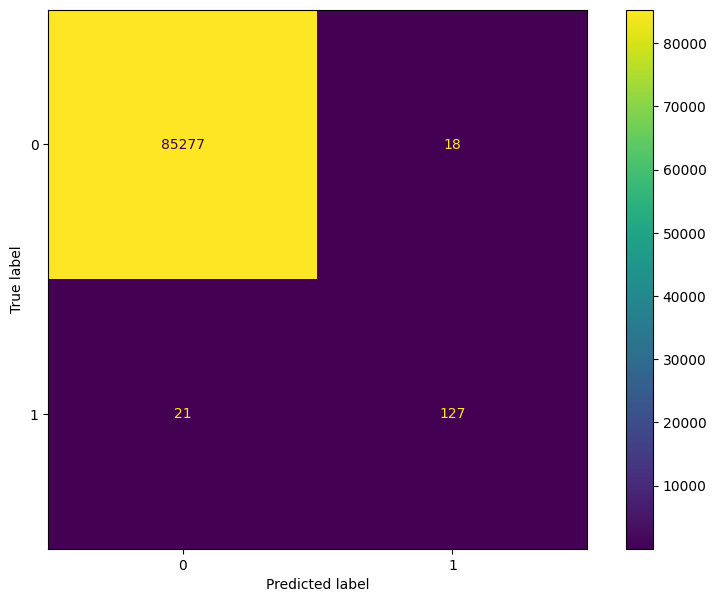

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred_RF = rf_Random_model.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RF, labels=rf_Random_model.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_Random_model.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Based on confusion matrix:



*   We successfully predicted 85277 legitimate customers  and 127 fraudsters






# Save The model and the Scaler

In [ ]:

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_Random_model, file)


# Save the scalers
# Combine fitted scaler objects into a dictionary
scalers = {'amount_scaler': fitted_scaler_amount, 'time_scaler': fitted_scaler_time}

# Save the dictionary containing fitted scalers as a single pickle file
with open('scalers.pkl', 'wb') as f:
    pickle.dump(scalers, f)


# Conclusion

During this project, we worked with a complex real-world problem: credit card fraud. Although the data was clean, without any missing values and mostly transformed, we still had to go through some important steps in order to build predictive models. Such steps are:

To explore the data;



* To normalize some of the columns
* To balance the dataset
* To train and test the models;
* To evaluate and compare the models.


As we reach the end of the project, it is reasonable to assume the result is satisfactory, since all the models present high accuracy scores. We can also notice how the results of the metrics vary from model to model. Training and comparing several models allows us to have a better understanding of each model's approach and then choose the one that is a better fit for our situation. Of course, when working with complex problems there's always room for improvement of the models, but for now, this is it.